In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

n = 100
dim = 2
n_clust = 2
blobs, labels = make_blobs(n, dim, centers=n_clust, cluster_std=0.4)
centers = []
for cdx in range(n_clust):
    centers.append(blobs[np.where(labels == cdx)].mean(axis=0))
centers = np.array(centers)

[]

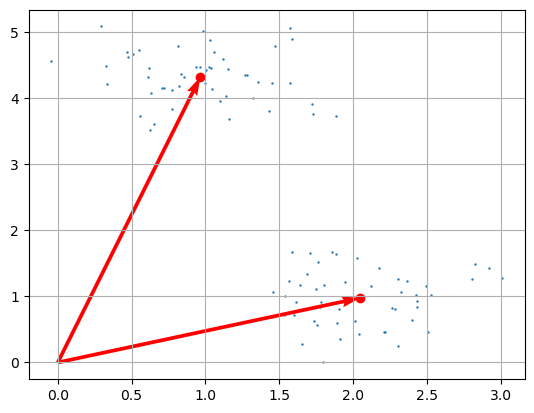

In [3]:
plt.scatter(blobs[:, 0], blobs[:, 1], s=0.5)
plt.quiver([0 for _ in range(n_clust)], [0 for _ in range(n_clust)], 
           centers[:, 0], centers[:, 1], color='r', angles='xy', scale_units='xy', scale=1)
plt.scatter(centers[:, 0], centers[:, 1], color='r')

#plt.xlim(-10, 10)
#plt.ylim(-10, 10)
plt.grid('major')
plt.plot()

In [4]:
centers_arr = np.zeros_like(blobs)
for idx in range(n):
    centers_arr[idx] = centers[labels[idx]]
dxes = blobs - centers_arr

[]

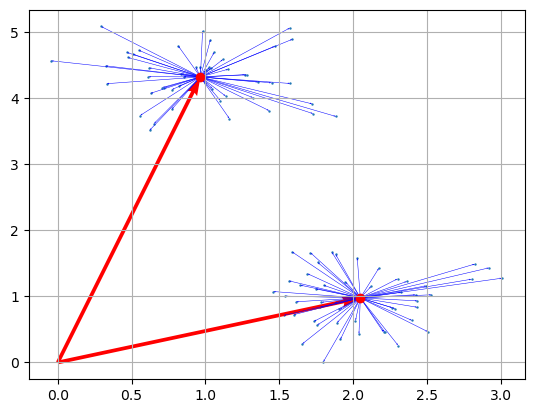

In [13]:
plt.scatter(blobs[:, 0], blobs[:, 1], s=0.5)
plt.quiver([0 for _ in range(n_clust)], [0 for _ in range(n_clust)], 
           centers[:, 0], centers[:, 1], color='r', angles='xy', scale_units='xy', scale=1)
plt.quiver(centers_arr[:, 0], centers_arr[:, 1], 
           dxes[:, 0], dxes[:, 1], color='b', angles='xy', scale_units='xy', scale=1, width=0.001)
plt.scatter(centers[:, 0], centers[:, 1], color='r')

#plt.xlim(-10, 10)
#plt.ylim(-10, 10)
plt.grid('major')
plt.plot()

In [5]:
print(n * centers_arr.flatten().dot(centers_arr.flatten()))

123770.05431160165


In [20]:
bmat = np.random.rand(2, 2)
qmat = np.kron(np.eye(n), bmat.dot(bmat.T))
#qmat_bad = np.repeat(np.power(np.arange(1, n*dim+1), 2)[:, np.newaxis], n*dim, axis=1)
idmat = np.eye(n * 2)

In [21]:
centers_flat = centers_arr.flatten()
dxes_flat = dxes.flatten()
blobs_flat = blobs.flatten()

center_sq = centers_flat @ qmat @ centers_flat
center_mix = centers_flat @ qmat @ dxes_flat
center_mix_2 = dxes_flat @ qmat @ centers_flat
print(center_sq)
print(center_mix)
print(center_mix_2)

1048.3386495508826
-1.0791367799356522e-13
-1.0696998842263383e-13
